# Linear Regression Project

An Ecommerce company based in New York City sells clothing online, but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

## STEP 0: PROBLEM STATEMENT

Business Problem:  The company is trying to decide whether to focus their efforts on their mobile app experience or their website. 

I'll work with the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

## STEP #1: IMPORT LIBRARIES AND DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ecom_customer = pd.read_csv('Ecommerce Customers')

In [3]:
ecom_customer.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
ecom_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [5]:
ecom_customer.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## STEP 2: Exploratory Data Analysis

*Now I'll use the pairplot method to explore the rest of the features and their relationships.*

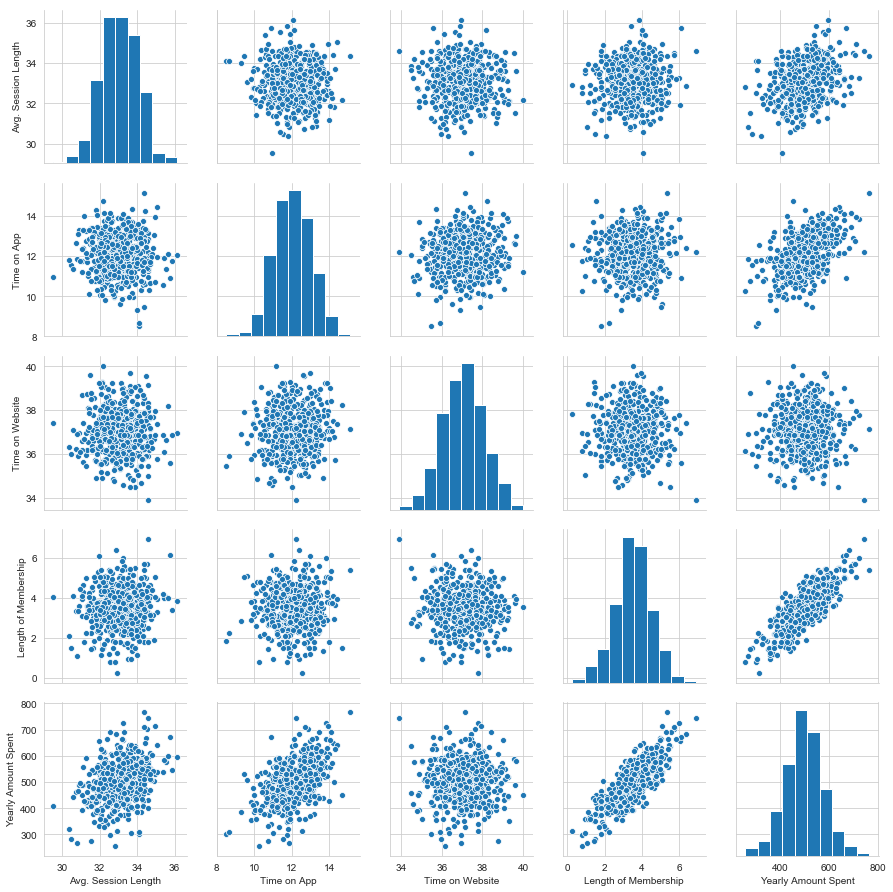

In [6]:
sns.set_style('whitegrid')
sns.pairplot(data = ecom_customer)

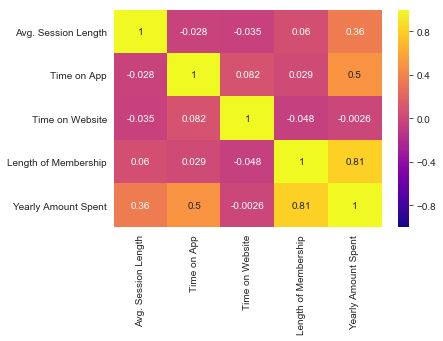

In [7]:
sns.heatmap(data= ecom_customer.corr(), annot= True, cmap= 'plasma', vmin = -1, vmax= 1)

*There appears to be a direct linear relationship between length of membership and yearly amount spent; similarly, time on app apears to share the same relationship.*

*To confirm my findings, I used Seaborn's jointplot method to create a linear model to show the relationship between length of membership and yearly amount spent.*

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


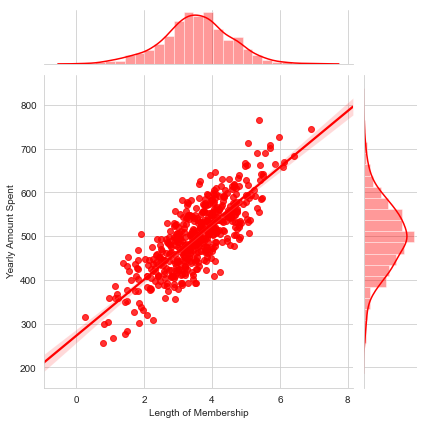

In [8]:
sns.jointplot(data = ecom_customer, x= 'Length of Membership', y= 'Yearly Amount Spent', \
              kind= 'reg', color = 'red')

*The linear relationship between length of membership and yearly amount spent is clear. It is a direct linear relationship.*

*To confirm my findings, I used Seaborn's jointplot method to create a linear model to show the relationship between time on app and yearly amount spent.*

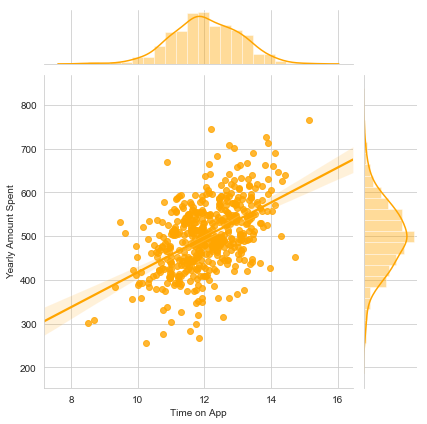

In [9]:
#I want to look at the relationship between time on the webiste and app vs. amount spent

sns.jointplot(data = ecom_customer, x= 'Time on App', y= 'Yearly Amount Spent', kind= 'reg', \
              color = 'orange')

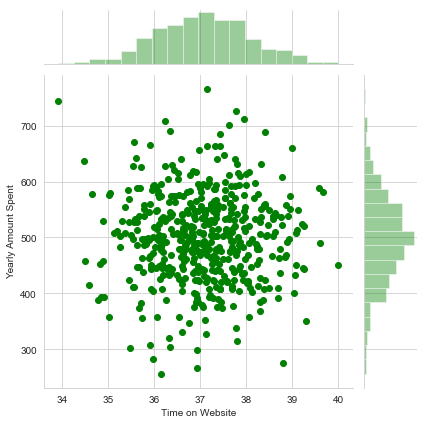

In [10]:
sns.jointplot(data = ecom_customer, x= 'Time on Website', y= 'Yearly Amount Spent', kind= 'scatter', \
              color = 'green')

*After looking at amount spent, I decided to look at the length of membership, as loyalty can be a key variable in predicting amount spent.  In this case, I used a jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.*

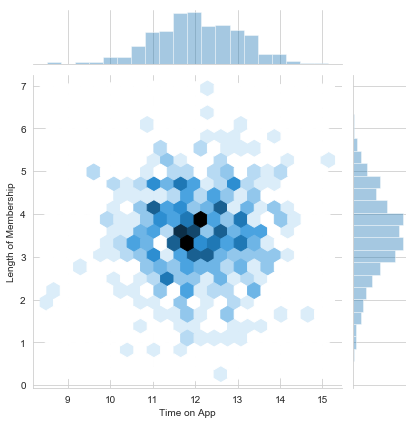

In [11]:
sns.jointplot(data= ecom_customer, x = 'Time on App', y= 'Length of Membership', kind= 'hex')

*Results suggest most customers using the app have been so between 3 and 5 years.*

*Now,  we'll see distribution of 'Target Variable'.

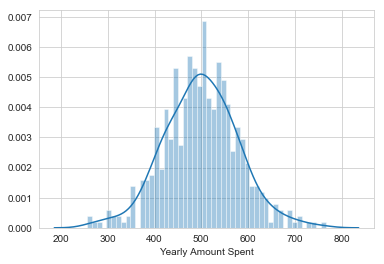

In [12]:
sns.distplot(a= ecom_customer['Yearly Amount Spent'], bins= 50)

## STEP 3: Data Prepration for Application of ML Models

In [13]:
ecom_customer.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [14]:
# After I'm comfortable with the data, I proceed to separate the data and drop any columns not needed
# I'm basically isolating the features for Model training in this step as "X" 
X = ecom_customer.drop(labels= ['Email','Address', 'Avatar', 'Yearly Amount Spent'], axis = 1)

# Here I identify the Target Variable and set it as "y"
y = ecom_customer['Yearly Amount Spent']

In [15]:
X.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

### Separation of data into Training and Testing data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# I usually use 25% for test size, but in this case, I'm going to use it 30%. Since, test data is not sufficient at 25%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [18]:
# Training data shape
X_train.shape

(350, 4)

In [19]:
# Testing data shape
X_test.shape

(150, 4)

In [20]:
X_train.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
202,31.525752,11.340036,37.039514,3.811248
428,31.862741,14.039867,37.022269,3.738225
392,33.258238,11.514949,37.128039,4.662845
86,33.877779,12.517666,37.151921,2.669942
443,33.025020,12.504220,37.645839,4.051382


In [21]:
y_train.head()

202    443.965627
428    556.298141
392    549.131573
86     487.379306
443    561.516532
Name: Yearly Amount Spent, dtype: float64

## STEP 4: TRAINING THE MODEL

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()
lm.fit(X= X_train, y= y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Intercept and coefficients of the model**

*After training the model, we can see the intercept and coefficients of the model.*

In [24]:
print('Intercept: ', lm.intercept_)
print('Coefficients: \n', lm.coef_)

Intercept:  -1047.9327822502385
Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


### Predicting Test Data
*Now that I've fit and trained the model, I need to evaluate its performance by predicting  the test values and visualize the results.*

Text(0, 0.5, 'Predicted Values')

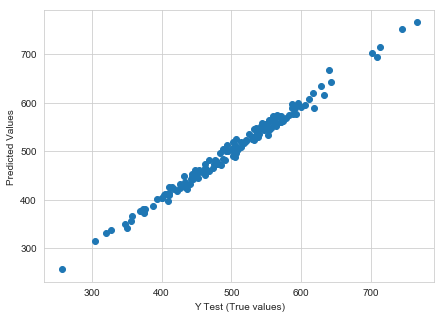

In [25]:
predictions = lm.predict(X = X_test)

plt.figure(figsize=(7,5))
plt.scatter(x= y_test, y= predictions)
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted Values')

## STEP 5: EVALUATING THE MODEL

### Evaluating the Model

Next, I evaluated model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [26]:
from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_true= y_test, y_pred= predictions))     # Mean Absolute Error
print('MSE: ', metrics.mean_squared_error(y_true= y_test, y_pred= predictions))      # Mean Squared Error
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_true= y_test, y_pred= predictions)))    # Root Mean Squared Error

MAE:  7.228148653430838
MSE:  79.81305165097461
RMSE:  8.933815066978642


In [27]:
# To get R^2 we use the "explained variance score"
print('Explaned Variance Score: ', metrics.explained_variance_score(y_true= y_test, y_pred= predictions))

Explaned Variance Score:  0.9890771231889606


It seems Linear Regression is a much better model of our **Ecommerce Customers** dataset: The error is lower (RMSE = 8.93), and the share of explained variation is significantly higher (R squared of 0.98). Moreover, an R squared value of 0.98 means that this linear model explains 98% of the total response variable variation.

### Residuals

*Next, I explore the residuals to make sure everything was okay with the data (i.e. it is Normally distributed).*

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


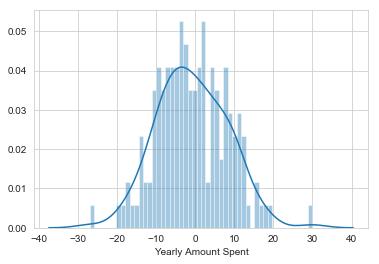

In [28]:
sns.distplot(a = (y_test - predictions), bins= 50)

## Conclusion

*Going back to the original question, it's time to decide whether we should focus on the mobile app or website development (Or maybe that doesn't even really matter, and Membership Time is what is really important).  I turn to the the coefficients to get an idea.*

In [29]:
# Here, I create a dataframe to hold the coefficients
coeff_df =  pd.DataFrame(data= lm.coef_, index= X.columns, columns= ['Coefficient'])

In [30]:
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpretation of the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of $25.98 **.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of \$38.59 **.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of \$0.19 **.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of \$61.28 **.

#### CONCLUSION: *The company should focus on the **Mobile App**, BUT THEY SHOULD ALSO see what they can do to increase **membership length** with perhaps a loyalty program tied to the mobile app.*